In [20]:
import sys
sys.path.append('../')

In [21]:
#loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [22]:
from sklearn.model_selection import train_test_split
from src.preprocessing import clean_data, scale_features
from src.modeling import train_model, evaluate_model

In [23]:
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


In [24]:
# Load the dataset

df = pd.read_csv('../data/car_purchasing.csv', encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


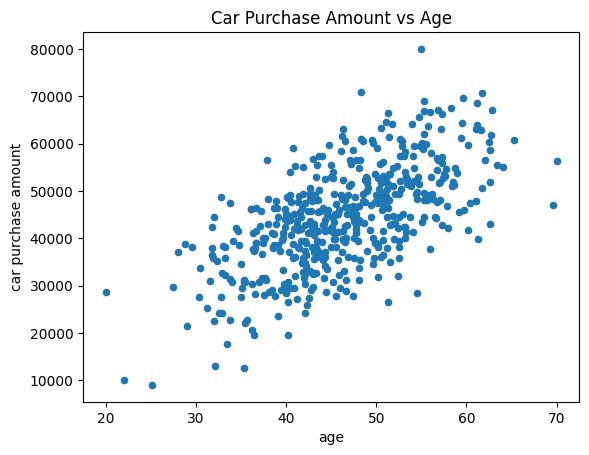

In [25]:
# data visualisations

df.plot(x='age', y='car purchase amount', kind='scatter', title='Car Purchase Amount vs Age')
plt.show()

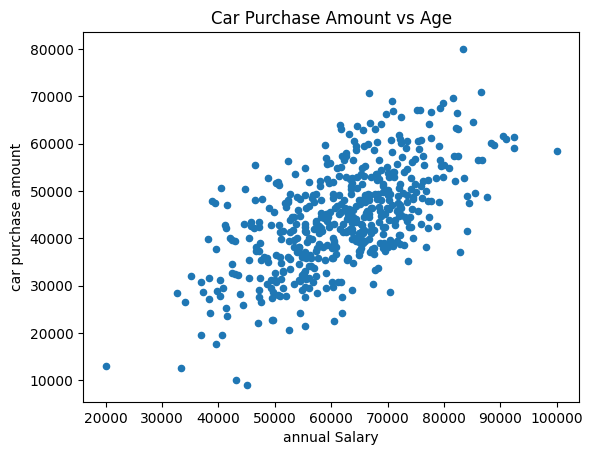

In [26]:

df.plot(x='annual Salary', y='car purchase amount', kind='scatter', title='Car Purchase Amount vs Age')
plt.show()

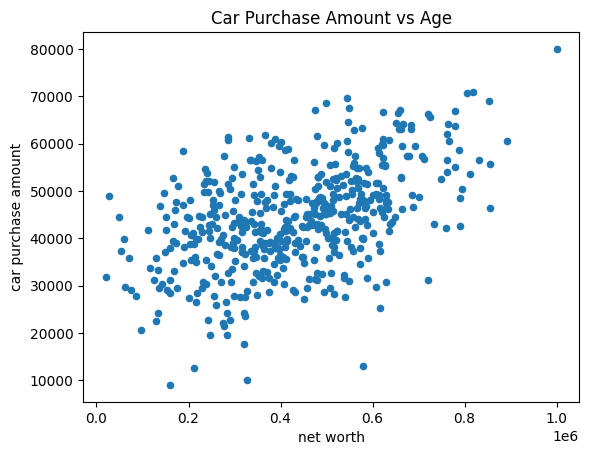

In [27]:

df.plot(x='net worth', y='car purchase amount', kind='scatter', title='Car Purchase Amount vs Age')
plt.show()

In [28]:
# Drop irrelevant columns
df = df.drop(columns=['customer name', 'customer e-mail'])

In [29]:
# Encode categorical features
df = pd.get_dummies(df, columns=['country'], drop_first=True)


In [30]:

# Features and target
X = df.drop(columns=['car purchase amount'])
y = df['car purchase amount']


In [31]:

# Scale features
X_scaled = scale_features(X)

In [32]:

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:

# Train model
model = train_model(X_train, y_train, model_type='rf')

In [34]:

# Evaluate
results = evaluate_model(model, X_test, y_test)
print("Model Performance:")
print(results)

Model Performance:
{'r2': 0.9472918524259603, 'rmse': 2385.5953608542773}


c:\Users\Harish\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
# Predict on test set
y_pred = model.predict(X_test)